In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

In [2]:
# load data set
# shuffle dataset
# split training 70 validation 10 and test 20 %
# split inputs and labels (output)
# one hot coding
# fit model without validation compare training and testing acuracies
# fit mode with validation (with history)
# create graph 
# adjust epoch pased on graph 
# check testing and training accuracies are matched or not
# (chapter 3: Listing  3:17,3:18,3:19,3:20)

In [3]:
dataset = pd.read_csv('sonar.csv', header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:

dataset=shuffle(dataset)
dataset = np.array(dataset)

In [5]:
train_d = dataset[:145,:60].astype('float')
train_l = dataset[:145,60:61]

train_v = dataset[146:165,:60].astype('float')
train_v_l= dataset[146:165,60:61]

test_d  = dataset[166:,60]
test_l = dataset[166:,60:61]


In [6]:
train_d

array([[0.0107, 0.0453, 0.0289, ..., 0.006 , 0.0017, 0.0036],
       [0.0664, 0.0575, 0.0842, ..., 0.0162, 0.0109, 0.0079],
       [0.0197, 0.0394, 0.0384, ..., 0.0045, 0.0047, 0.0054],
       ...,
       [0.0308, 0.0339, 0.0202, ..., 0.0122, 0.0056, 0.002 ],
       [0.0071, 0.0103, 0.0135, ..., 0.0032, 0.0073, 0.0063],
       [0.0762, 0.0666, 0.0481, ..., 0.0048, 0.0107, 0.0094]])

In [7]:


encoder = LabelEncoder()
encoder.fit(dataset[:,60:61])

y_train = encoder.transform(train_l)
y_train_v = encoder.transform(train_v_l)
y_test = encoder.transform(test_l)



C:\Users\Asad Latif\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Asad Latif\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(60,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.compile(optimizer = 'rmsprop' ,loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(train_d,
    y_train,
    epochs=90,
    batch_size=16)


Train on 145 samples
Epoch 1/90
145/145 [==============================] - 0s 254us/sample - loss: 0.2492 - accuracy: 0.8966
Epoch 2/90
145/145 [==============================] - 0s 193us/sample - loss: 0.2419 - accuracy: 0.8966
Epoch 3/90
145/145 [==============================] - 0s 200us/sample - loss: 0.2594 - accuracy: 0.8690
Epoch 4/90
145/145 [==============================] - 0s 186us/sample - loss: 0.2395 - accuracy: 0.9034
Epoch 5/90
145/145 [==============================] - 0s 207us/sample - loss: 0.2401 - accuracy: 0.8966
Epoch 6/90
145/145 [==============================] - 0s 200us/sample - loss: 0.2346 - accuracy: 0.8897
Epoch 7/90
145/145 [==============================] - 0s 221us/sample - loss: 0.2722 - accuracy: 0.8552
Epoch 8/90
145/145 [==============================] - 0s 221us/sample - loss: 0.2320 - accuracy: 0.8966
Epoch 9/90
145/145 [==============================] - 0s 200us/sample - loss: 0.2362 - accuracy: 0.8897
Epoch 10/90
145/145 [======================

In [11]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy'])

In [12]:
history_validation = model.fit(train_d,
    y_train,
    epochs=50,
    batch_size=16,
    validation_data=(train_v, y_train_v))


Train on 145 samples, validate on 19 samples
Epoch 1/50
145/145 [==============================] - 0s 2ms/sample - loss: 0.3786 - accuracy: 0.8207 - val_loss: 0.4064 - val_accuracy: 0.7368
Epoch 2/50
145/145 [==============================] - 0s 453us/sample - loss: 0.3686 - accuracy: 0.8207 - val_loss: 0.3771 - val_accuracy: 0.7895
Epoch 3/50
145/145 [==============================] - 0s 380us/sample - loss: 0.3544 - accuracy: 0.8345 - val_loss: 0.3623 - val_accuracy: 0.8947
Epoch 4/50
145/145 [==============================] - 0s 404us/sample - loss: 0.3627 - accuracy: 0.8276 - val_loss: 0.3666 - val_accuracy: 0.8947
Epoch 5/50
145/145 [==============================] - 0s 371us/sample - loss: 0.3511 - accuracy: 0.8276 - val_loss: 0.3346 - val_accuracy: 0.8421
Epoch 6/50
145/145 [==============================] - 0s 410us/sample - loss: 0.3761 - accuracy: 0.8207 - val_loss: 0.3623 - val_accuracy: 0.8947
Epoch 7/50
145/145 [==============================] - 0s 426us/sample - loss: 0.3

In [13]:
history_dict_v = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy'])

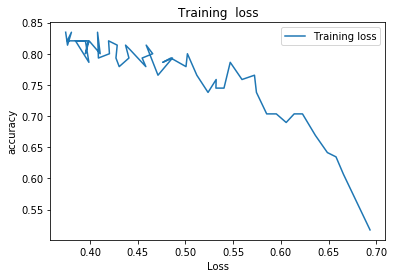

In [17]:
import matplotlib.pyplot as plt
loss = history_dict['loss']
accuracy = history_dict['accuracy']
plt.plot(loss,accuracy, label='Training loss')
plt.title('Training  loss')
plt.xlabel('Loss')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [18]:
# e=50
# loss = history_dict['loss']
# accuracy = history_dict['accuracy']
# plt.plot(e,accuracy, label='Training loss')
# plt.title('Epoch and Accuracy')
# plt.xlabel('epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.show()
import matplotlib.pyplot as plt
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

KeyError: 'val_loss'